In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from IPython.display import display, HTML

In [2]:
nyt = pd.read_table("nyt_data.txt", header = None)
vocab = pd.read_table("nyt_vocab.dat", header = None)

In [3]:
nyt

,0
0,"1946:2,1168:2,1194:2,1275:1,777:1,522:1,107:1,..."
1,"905:1,1962:1,38:2,421:1,294:1,424:1,2958:1,451..."
2,"162:1,424:1,812:1,266:2,1780:1,262:2,2697:1,12..."
3,"383:1,304:1,2232:1,294:3,195:2,2265:1,1773:1,7..."
4,"1849:2,176:1,905:2,2:1,38:2,398:1,173:1,259:1,..."
5,"1253:2,50:1,680:1,12:1,2679:1,163:2,554:2,768:..."
6,"1065:2,2848:1,173:2,421:2,522:1,2967:1,356:1,2..."
7,"1762:1,618:1,777:1,1328:1,1712:1,1646:1,195:1,..."
8,"458:1,290:2,70:2,235:1,2527:2,80:1,469:1,129:1..."
9,"2396:1,1917:1,735:1,92:1,320:1,563:1,418:1,89:..."


In [4]:
X = pd.DataFrame(0, index = np.arange(8447), columns = np.arange(1, 3013))

In [5]:
for i in range(len(nyt)):
    splits = nyt.loc[i][0].split(",")
    for j in range(len(splits)):
        word, freq = splits[j].split(":")
        X.loc[i][int(word)] = int(freq)
    if i%1000==0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000


In [15]:
d = 25

W = np.random.uniform(1, 2, size = d * len(X))
W = W.reshape(len(W)/d, d)

H = np.random.uniform(1, 2, size = d * X.shape[1])
H = H.reshape(d, len(H)/d)

/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [16]:
objective = []

for t in range(100): #change to 10
    purple = np.divide(X, np.matmul(W, H)+1.0000e-16)
    
    W_norm = (W / (W.T.sum(axis=1)+1.0000e-16)).T
    H = np.multiply(H, np.matmul(W_norm, purple))
    
    purple = np.divide(X, np.matmul(W, H)+1.0000e-16)
    
    H_norm = (H.T / (H.T.sum(axis=0)+1.0000e-16))
    W = np.multiply(W, np.matmul(purple, H_norm))
    
    if t%10==0:
        print(t)
    
    WH = np.matmul(W, H)
    objective.append(-np.sum((np.sum((X*np.log(WH) - WH), axis = 1)), axis = 0))
    #objective.append(-np.sum(np.sum(np.multiply(X, (1/ np.log(np.matmul(W, H))+1.0000e-16)) - np.matmul(W, H))))
    

0
10
20
30
40
50
60
70
80
90


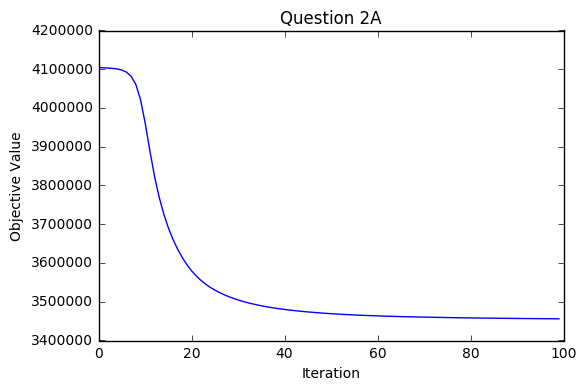

In [415]:
fig = plt.figure()
#labels = [1, 2, 3, 4, 5, 6, 7]

plt.plot(objective)
    
#plt.legend(labels, loc='lower left', ncol = 2)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Question 2A')

plt.show()
#ADD LABELS

In [424]:
#create multiple column display of dataframes

def multi_column_df_display(list_dfs, cols=5):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

list_dfs = []
#normalize results
results = (H.T / (H.T.sum(axis=0)+1.0000e-16))
results = pd.DataFrame(results)
for i in range(results.shape[1]):
    df = pd.DataFrame({
        'Words': np.array(np.squeeze(vocab.loc[np.array(np.argsort(results[i])[::-1][:10])])),
        'Values': np.array(np.sort(results[i])[::-1][:10])
    }, columns = ['Words', 'Values'])
    list_dfs.append(df)

multi_column_df_display(list_dfs)


,Words,Values
0,art,0.014460
1,design,0.010775
2,collection,0.010506
3,artist,0.010366
4,museum,0.009050
5,photograph,0.008972
6,exhibition,0.007844
7,color,0.007439
8,display,0.007271
9,paint,0.007253


In [3]:
!jupyter nbconvert --to script Topic_Modeling.ipynb

[NbConvertApp] Converting notebook Topic_Modeling.ipynb to script
[NbConvertApp] Writing 2962 bytes to Topic_Modeling.py
